**6.1 处理文本数据**

单词和字符的one-hot编码

In [10]:
# 单词级的one-hot编码（简单示例）
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.'] # 初试数据：每个样本是列表的一个元素
                                                                  # （本例中的样本是一个句子，但也可以是一整篇文档）
    
token_index = {} # 构建数据中所有标记的索引
for sample in samples:
    for word in sample.split():      # 利用split方法对样本进行粉刺。在实际应用中，还需要从样本中去掉
        if word not in token_index:  # 标点和特殊符号
            token_index[word] = len(token_index) + 1 # 为每个唯一单词指定一个唯一索引。
                                                     # 注意，没有为索引编号0指定单词
max_length = 10 # 对样本进行分词。只考虑每个样本前max_length个单词

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1)) # 将结果保存在results中

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[: max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [12]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [11]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [13]:
# 字符级的one-hot编码（简单示例）
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # 所有可打印的ASCII字符
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50 
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [14]:
token_index

{1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: 'a',
 12: 'b',
 13: 'c',
 14: 'd',
 15: 'e',
 16: 'f',
 17: 'g',
 18: 'h',
 19: 'i',
 20: 'j',
 21: 'k',
 22: 'l',
 23: 'm',
 24: 'n',
 25: 'o',
 26: 'p',
 27: 'q',
 28: 'r',
 29: 's',
 30: 't',
 31: 'u',
 32: 'v',
 33: 'w',
 34: 'x',
 35: 'y',
 36: 'z',
 37: 'A',
 38: 'B',
 39: 'C',
 40: 'D',
 41: 'E',
 42: 'F',
 43: 'G',
 44: 'H',
 45: 'I',
 46: 'J',
 47: 'K',
 48: 'L',
 49: 'M',
 50: 'N',
 51: 'O',
 52: 'P',
 53: 'Q',
 54: 'R',
 55: 'S',
 56: 'T',
 57: 'U',
 58: 'V',
 59: 'W',
 60: 'X',
 61: 'Y',
 62: 'Z',
 63: '!',
 64: '"',
 65: '#',
 66: '$',
 67: '%',
 68: '&',
 69: "'",
 70: '(',
 71: ')',
 72: '*',
 73: '+',
 74: ',',
 75: '-',
 76: '.',
 77: '/',
 78: ':',
 79: ';',
 80: '<',
 81: '=',
 82: '>',
 83: '?',
 84: '@',
 85: '[',
 86: '\\',
 87: ']',
 88: '^',
 89: '_',
 90: '`',
 91: '{',
 92: '|',
 93: '}',
 94: '~',
 95: ' ',
 96: '\t',
 97: '\n',
 98: '\r',
 99: '\x0b',
 100: '\x0c'

In [17]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [18]:
# 用Keras实现单词级的one-hot编码
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 创建一个分词器(tokenizer)，设置为只考虑前1000个最常见的单词
tokenizer.fit_on_texts(samples) # 构建单词索引

sequences = tokenizer.texts_to_sequences(samples) # 将字符串转换为整数索引组成的列表

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') # 也可以直接得到one-hot二进制表示。
                                                                    # 这个分词器也支持除one-hot编码外的其他向量化模式
word_index = tokenizer.word_index # 找回单词索引
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [21]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [22]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [24]:
# 使用散列技巧的单词级的one-hot编码（简单示例）
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000 # 将单词保存为长度为1000的向量。如果单词数量接近1000个（或更多），
                      # 那么会遇到很多散列冲突，这回降低这种编码方法的准确性
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[: max_length]:
        index = abs(hash(word)) % dimensionality # 将单词散列为0~1000范围的一个随机整数索引
        results[i, j, index] = 1.

In [39]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

使用词嵌入

1 利用Embedding层学习词嵌入

In [40]:
# 将一个Embedding层实例化
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64) # Embedding层至少需要两个参数：标记的个数
                                      # （这里是1000，即最大单词索引+1）和嵌入的维度（这里是64）


In [46]:
# 加载IMDB数据，准备用于Embedding层
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000 # 作为特征的单词个数
maxlen = 20 # 在这么多单词后截断文本（这些单词都属于前max_features个最常见的单词）

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 将数据加载为整数列表

x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # 将整数列表转换成形状为(samples, maxlen)的二维整数张量
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [47]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [49]:
# 在IMDB数据上使用Embedding层和分类器
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 指定Embedding层的最大输入长度，以便后面将嵌入输入展平。
                                                    # Embedding层激活的形状为(samples, maxlen, 8)
model.add(Flatten()) # 将三维的嵌入张量展平成形状为(samples, maxlen * 8)的二维张量

model.add(Dense(1, activation='sigmoid')) # 在上面添加分类器
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 308us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 3s 134us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 135us/step - los

2 使用预训练的词嵌入

整合在一起：从原始文本到词嵌入

In [1]:
# 处理IMDB原始数据的标签
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [13]:
# 对IMDB原始数据的文本进行分词
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 在100个单词后截断评论
training_samples = 200 # 在200个样本上训练
validation_samples = 10000 # 在10000个样本上验证
max_words = 10000 # 只考虑数据集中前10000个最常见的单词

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0]) # 将数据划分为训练集和验证集，但首先要打乱数据，因为一开始
                                    # 数据中的样本是排好序的（所有负面评论都在前面，然后是所有的正面评论）
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [14]:
# 解析GloVe词嵌入文件
glove_dir = 'glove.6B'

embeddings_index = { }
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [15]:
list(embeddings_index.keys())[:10]

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [16]:
list(embeddings_index.values())[0].shape

(100,)

In [17]:
# 准备GloVe词嵌入矩阵
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 嵌入索引(embedding_index)中找不到的词，其嵌入向量全为0

In [18]:
# 模型定义
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 将预训练的词嵌入加载到Embedding层中
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [20]:
# 训练与评估
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 1.6885 - acc: 0.4500 - val_loss: 0.6991 - val_acc: 0.4948
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6041 - acc: 0.6700 - val_loss: 0.6952 - val_acc: 0.5039
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5523 - acc: 0.7800 - val_loss: 0.6969 - val_acc: 0.5077
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4865 - acc: 0.8350 - val_loss: 0.7413 - val_acc: 0.5044
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3255 - acc: 0.9700 - val_loss: 0.7364 - val_acc: 0.5034
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3662 - acc: 0.8500 - val_loss: 0.7676 - val_acc: 0.5098
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2079 - acc: 1.0000 - val_loss: 0.7461 - val_acc: 0.5063
Epoch 8/10
200/200 [========

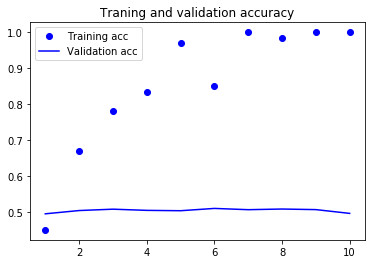

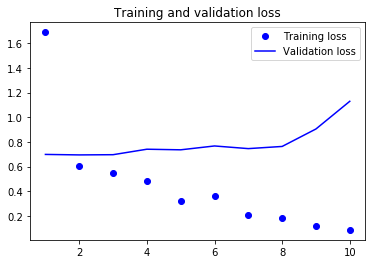

In [21]:
# 绘制结果
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# 在不使用预训练词嵌入的情况下，训练相同的模型
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6972 - acc: 0.4050 - val_loss: 0.6944 - val_acc: 0.5041
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5178 - a

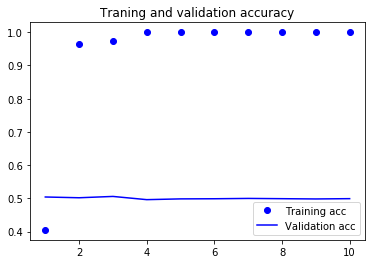

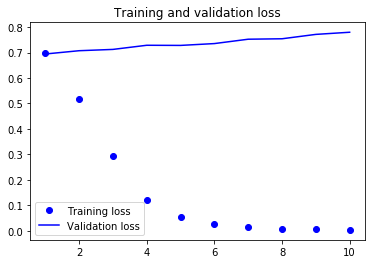

In [23]:
# 绘制结果
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# 对测试集数据进行粉刺
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [36]:
# 在测试集上评估模型
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 62us/step


[1.1448048040676118, 0.4972]

**6.2 理解循环神经网络**

In [37]:
# RNN伪代码
def RNN_0():
    state_t = 0 # t时刻的状态
    for input_t in input_sequence: # 对序列元素进行遍历
        output_t = f(input_t, state_t)
        state_t = output_t # 前一次的输出变成下一次迭代的状态

In [1]:
# 更详细的RNN伪代码
def RNN_1():
    state_t = 0
    for input_t in input_sequence:
        output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
        state_t = output_t

In [4]:
# 简单的RNN的Numpy实现
import numpy as np

timesteps = 100 # 输入序列的时间步数
input_features = 32 # 输入特征空间的维度
output_features = 64 # 输出特征空间的维度

inputs = np.random.random((timesteps, input_features)) # 输入数据：随机噪声，仅作为示例

state_t = np.zeros((output_features,)) # 初始状态：全零向量

# 创建随机的权重矩阵
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t是形状为(input_features,)的向量
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 由输入和当前状态（前一个输出）
                                                                    # 计算得到当前输出
    successive_outputs.append(output_t) # 将这个输出保存到一个列表中
        
    state_t = output_t # 更新网络的状态，用于下一个时间步
        
final_output_sequence = np.stack(successive_outputs, axis=0) # 最终输出是一个形状为(timesteps, output_features)的二维张量

Keras中的SimpleRNN层可以实现循环层

In [22]:
# 只返回最后一个时间步的输出
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 返回完整的状态序列
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 多个循环层逐个堆叠，让所有中间层都返回完整的输出序列
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary() # 最后一层仅返回最终输出

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


用上面的模型应用于IMDB电影评论分类问题

In [25]:
# 准备IMDB数据
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 作为特征的单词个数
maxlen = 500 # 在这么多单词之后截断文本（这些单词都是属于前max_features个最常见的单词）
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [27]:
# 用Embedding层和SimpleRNN层来训练模型
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.5729 - acc: 0.6903 - val_loss: 0.4011 - val_acc: 0.8340
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.3678 - acc: 0.8491 - val_loss: 0.3779 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2808 - acc: 0.8908 - val_loss: 0.3534 - val_acc: 0.8524
Epoch 4/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2327 - acc: 0.9114 - val_loss: 0.4443 - val_acc: 0.7860
Epoch 5/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1903 - acc: 0.9292 - val_loss: 0.4030 - val_acc: 0.8382
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1484 - acc: 0.9470 - val_loss: 0.3590 - val_acc: 0.8670
Epoch 7/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1140 - acc: 0.9601 - val_loss: 0.4129 - val_acc:

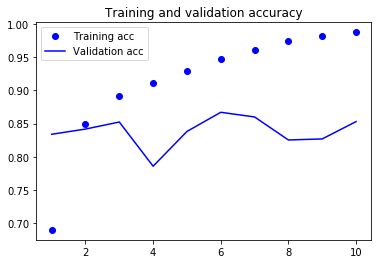

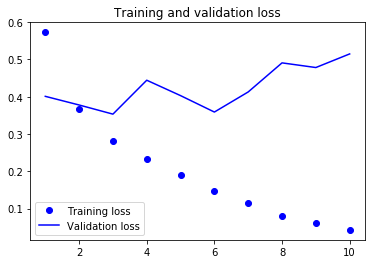

In [29]:
# 绘制结果
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

理解LSTM层和GRU层

In [32]:
'''
# LSTM架构的详细伪代码(1/2)
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

# LSTM架构的详细伪代码(2/2)
c_t+1 = i_t * k_t + c_t * f_t
'''

'\n# LSTM架构的详细伪代码(1/2)\noutput_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)\n\ni_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)\nf_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)\nk_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)\n\n# LSTM架构的详细伪代码(2/2)\nc_t+1 = i_t * k_t + c_t * f_t\n'

Keras中一个LSTM的具体例子

In [34]:
# 使用Keras中的LSTM层
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.5046 - acc: 0.7606 - val_loss: 0.3320 - val_acc: 0.8650
Epoch 2/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.2830 - acc: 0.8880 - val_loss: 0.6646 - val_acc: 0.8014
Epoch 3/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.2267 - acc: 0.9152 - val_loss: 0.2996 - val_acc: 0.8700
Epoch 4/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1941 - acc: 0.9277 - val_loss: 0.3348 - val_acc: 0.8518
Epoch 5/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.1729 - acc: 0.9365 - val_loss: 0.3249 - val_acc: 0.8840
Epoch 6/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.1606 - acc: 0.9430 - val_loss: 0.4019 - val_acc: 0.8774
Epoch 7/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1423 - acc: 0.9500 - val_loss: 0.3490 - v

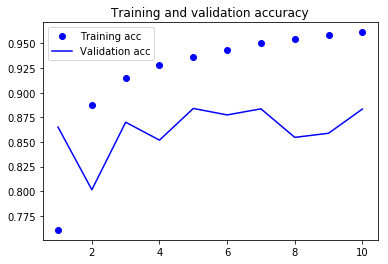

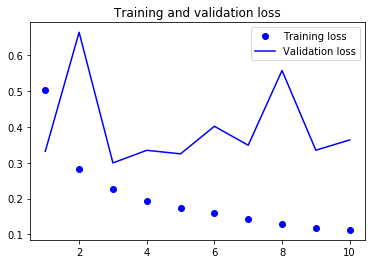

In [35]:
# 绘制结果
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**6.3 循环神经网络的高级用法**

温度预测问题

In [1]:
# 观察耶拿天气数据集的数据
import os

data_dir = 'jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [2]:
# 解析数据
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

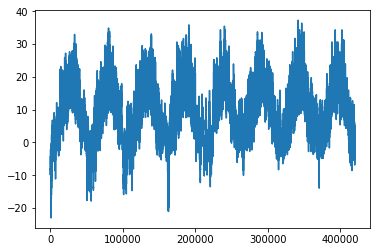

In [4]:
%matplotlib inline
# 绘制温度时间序列
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 温度（单位：摄氏度）
plt.plot(range(len(temp)), temp)

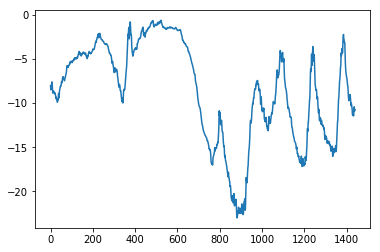

In [5]:
# 绘制前10天的温度时间序列
plt.plot(range(1440), temp[:1440])

准备数据

In [6]:
# 数据标准话
mean = float_data[: 200000].mean(axis=0)
float_data -= mean
std = float_data[: 200000].std(axis=0)
float_data /= std

In [7]:
# 生成时间序列样本及其目标的生成器
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay -1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size = batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [23]:
# 准备训练生成器、验证生成器和测试生成器
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size # 为了查看整个验证集，需要从val_gen中抽取多少次

test_steps = (len(float_data) - 300001 - lookback) // batch_size # 为了查看整个测试集，需要从test_gen中抽取多少次

In [9]:
val_steps, test_steps

(769, 930)

一种基于常识的、非机器学习的基准方法

In [60]:
# 计算符合常识的基准方法的MAE
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets)) # 平方绝对误差(MAE)
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [62]:
# 将MAE转换成摄氏温度误差
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

一种基本的机器学习方法

In [64]:
# 训练并评估一个密集连接模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 1.2458 - val_loss: 0.4922
Epoch 2/20
500/500 [==============================] - 13s 27ms/step - loss: 0.3972 - val_loss: 0.3279
Epoch 3/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2888 - val_loss: 0.3520
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2688 - val_loss: 0.3081
Epoch 5/20
500/500 [==============================] - 17s 33ms/step - loss: 0.2542 - val_loss: 0.3593
Epoch 6/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2456 - val_loss: 0.3266
Epoch 7/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2380 - val_loss: 0.3202
Epoch 8/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2314 - val_loss: 0.3340
Epoch 9/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2278 - val_loss: 0.3252
Epoch 10/20
500/500 [==============================] - 15s 30ms/step - loss: 0.223

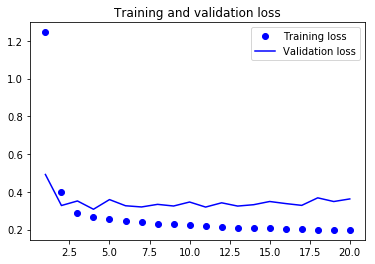

In [65]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

第一个循环网络基准

In [66]:
# 训练并评估一个基于GRU的模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history =model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 212s 423ms/step - loss: 0.3087 - val_loss: 0.2746
Epoch 2/20
500/500 [==============================] - 207s 414ms/step - loss: 0.2856 - val_loss: 0.2690
Epoch 3/20
500/500 [==============================] - 205s 410ms/step - loss: 0.2783 - val_loss: 0.2687
Epoch 4/20
500/500 [==============================] - 211s 423ms/step - loss: 0.2703 - val_loss: 0.2632
Epoch 5/20
500/500 [==============================] - 206s 411ms/step - loss: 0.2647 - val_loss: 0.2692
Epoch 6/20
500/500 [==============================] - 205s 411ms/step - loss: 0.2622 - val_loss: 0.2658
Epoch 7/20
500/500 [==============================] - 206s 413ms/step - loss: 0.2576 - val_loss: 0.2686
Epoch 8/20
500/500 [==============================] - 210s 419ms/step - loss: 0.2513 - val_loss: 0.2691
Epoch 9/20
500/500 [==============================] - 204s 408ms/step - loss: 0.2475 - val_loss: 0.2679
Epoch 10/20
500/500 [==============================] - 198s 395m

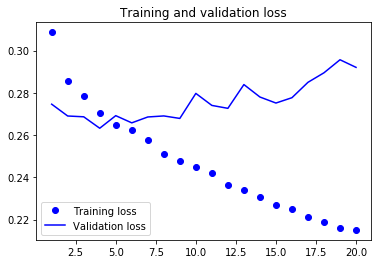

In [67]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用循环dropout来降低过拟合

In [68]:
# 训练并评估一个使用dropout正则化的基于GRU的模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 216s 432ms/step - loss: 0.3435 - val_loss: 0.2879
Epoch 2/40
500/500 [==============================] - 215s 431ms/step - loss: 0.3182 - val_loss: 0.2732
Epoch 3/40
500/500 [==============================] - 216s 433ms/step - loss: 0.3117 - val_loss: 0.2750
Epoch 4/40
500/500 [==============================] - 217s 434ms/step - loss: 0.3060 - val_loss: 0.2689
Epoch 5/40
500/500 [==============================] - 218s 435ms/step - loss: 0.3008 - val_loss: 0.2704
Epoch 6/40
500/500 [==============================] - 217s 434ms/step - loss: 0.3002 - val_loss: 0.2748
Epoch 7/40
500/500 [==============================] - 218s 437ms/step - loss: 0.2962 - val_loss: 0.2658
Epoch 8/40
500/500 [==============================] - 217s 433ms/step - loss: 0.2940 - val_loss: 0.2678
Epoch 9/40
500/500 [==============================] - 217s 434ms/step - loss: 0.2918 - val_loss: 0.2668
Epoch 10/40
500/500 [==============================] - 217s 434m

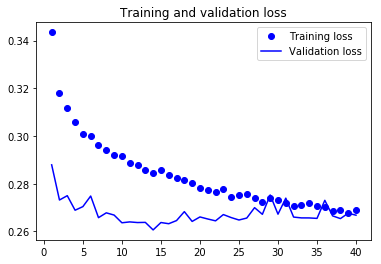

In [69]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

循环层堆叠

In [70]:
# 训练并评估一个使用dropout正则化的堆叠GRU模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 454s 908ms/step - loss: 0.3366 - val_loss: 0.2823
Epoch 2/40
500/500 [==============================] - 436s 873ms/step - loss: 0.3136 - val_loss: 0.2719
Epoch 3/40
500/500 [==============================] - 435s 871ms/step - loss: 0.3083 - val_loss: 0.2764
Epoch 4/40
500/500 [==============================] - 434s 869ms/step - loss: 0.3032 - val_loss: 0.2690
Epoch 5/40
500/500 [==============================] - 434s 868ms/step - loss: 0.2992 - val_loss: 0.2706
Epoch 6/40
500/500 [==============================] - 434s 868ms/step - loss: 0.2953 - val_loss: 0.2767
Epoch 7/40
500/500 [==============================] - 435s 869ms/step - loss: 0.2938 - val_loss: 0.2673
Epoch 8/40
500/500 [==============================] - 434s 868ms/step - loss: 0.2889 - val_loss: 0.2706
Epoch 9/40
500/500 [==============================] - 435s 869ms/step - loss: 0.2879 - val_loss: 0.2671
Epoch 10/40
500/500 [==============================] - 435s 871m

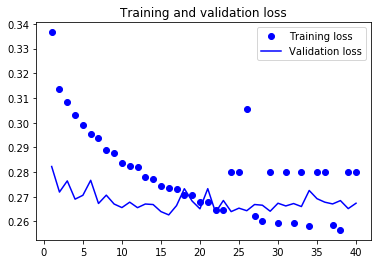

In [77]:
# 绘制结果
import matplotlib.pyplot as plt

loss = np.array(history.history['loss'])
loss[loss > 0.4] = np.mean(loss[loss < 0.4]) # 处理异常值

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用双向RNN

In [79]:
# 使用逆序序列训练并评估一个LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000 # 作为特征的单词个数
maxlen = 500 # 在这么多单词之后截断文本（这些单词都属于前max_features个最常见的单词）

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 加载数据

# 将顺序反转
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 填充序列
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.4878 - acc: 0.7701 - val_loss: 0.3734 - val_acc: 0.8630
Epoch 2/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.3101 - acc: 0.8823 - val_loss: 0.4114 - val_acc: 0.8228
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.2742 - acc: 0.9046 - val_loss: 0.3301 - val_acc: 0.8656
Epoch 4/10
20000/20000 [==============================] - 143s 7ms/step - loss: 0.2226 - acc: 0.9192 - val_loss: 0.3445 - val_acc: 0.8746
Epoch 5/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.1928 - acc: 0.9329 - val_loss: 0.3491 - val_acc: 0.8792
Epoch 6/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.1774 - acc: 0.9398 - val_loss: 0.3768 - val_acc: 0.8736
Epoch 7/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.1556 - acc: 0.9479 - val_loss: 0.5858 - v

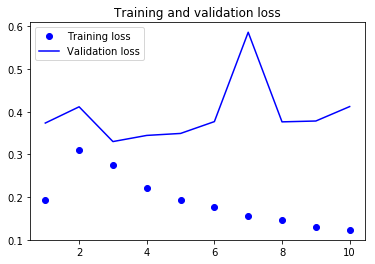

In [80]:
# 绘制结果
import matplotlib.pyplot as plt

loss = np.array(history.history['loss'])
loss[loss > 0.4] = np.mean(loss[loss < 0.4]) # 处理异常值

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
# 训练并评估一个双向LSTM
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 258s 13ms/step - loss: 0.5592 - acc: 0.7171 - val_loss: 0.4278 - val_acc: 0.8348
Epoch 2/10
20000/20000 [==============================] - 260s 13ms/step - loss: 0.3336 - acc: 0.8695 - val_loss: 0.5860 - val_acc: 0.8056
Epoch 3/10
20000/20000 [==============================] - 265s 13ms/step - loss: 0.2701 - acc: 0.9013 - val_loss: 0.3383 - val_acc: 0.8756
Epoch 4/10
20000/20000 [==============================] - 269s 13ms/step - loss: 0.2302 - acc: 0.9143 - val_loss: 0.2964 - val_acc: 0.8862
Epoch 5/10
20000/20000 [==============================] - 269s 13ms/step - loss: 0.2045 - acc: 0.9288 - val_loss: 0.3385 - val_acc: 0.8862
Epoch 6/10
20000/20000 [==============================] - 272s 14ms/step - loss: 0.1777 - acc: 0.9356 - val_loss: 0.3775 - val_acc: 0.8846
Epoch 7/10
20000/20000 [==============================] - 270s 13ms/step - loss: 0.1670 - acc: 0.9407 - val_loss: 0.3

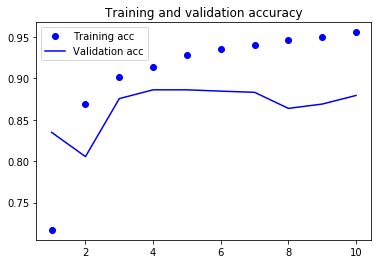

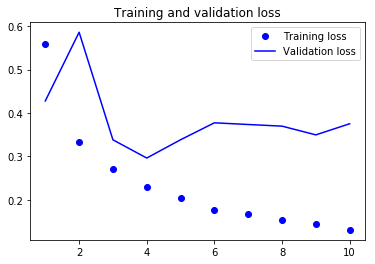

In [83]:
# 绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# 训练一个双向GRU
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
                    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Using TensorFlow backend.


Epoch 1/40
500/500 [==============================] - 416s 832ms/step - loss: 0.2919 - val_loss: 0.2659
Epoch 2/40
500/500 [==============================] - 394s 788ms/step - loss: 0.2748 - val_loss: 0.2655
Epoch 3/40
500/500 [==============================] - 401s 802ms/step - loss: 0.2680 - val_loss: 0.2650
Epoch 4/40
500/500 [==============================] - 399s 798ms/step - loss: 0.2610 - val_loss: 0.2656
Epoch 5/40
500/500 [==============================] - 364s 728ms/step - loss: 0.2569 - val_loss: 0.2714
Epoch 6/40
500/500 [==============================] - 367s 734ms/step - loss: 0.2496 - val_loss: 0.2740
Epoch 7/40
500/500 [==============================] - 368s 737ms/step - loss: 0.2439 - val_loss: 0.2754
Epoch 8/40
500/500 [==============================] - 365s 729ms/step - loss: 0.2395 - val_loss: 0.2821
Epoch 9/40
500/500 [==============================] - 364s 728ms/step - loss: 0.2335 - val_loss: 0.2809
Epoch 10/40
500/500 [==============================] - 388s 777m

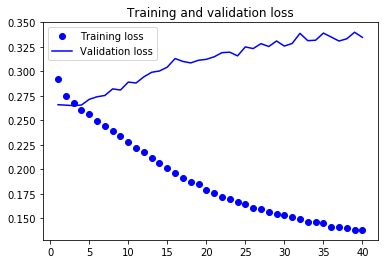

In [12]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**6.4 用卷积神经网络处理序列**

实现一维卷积神经网络

In [13]:
# 准备IMDB数据
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences ( sample x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences ( sample x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [14]:
# 在IMDB数据上训练并评估一个简单的一维卷积神经网络
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


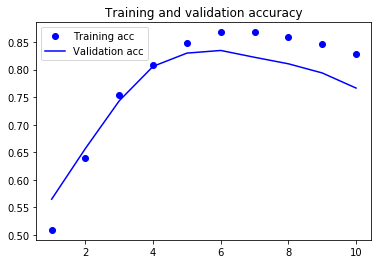

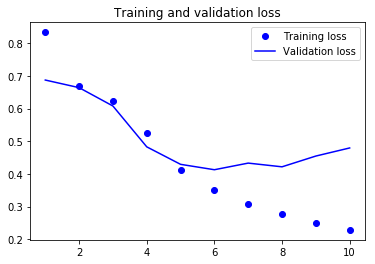

In [15]:
# 绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

结合CNN和RNN来处理长序列

In [24]:
# 在耶拿数据上训练并评估一个简单的一维卷积神经网络
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 15s 31ms/step - loss: 0.4210 - val_loss: 0.4379
Epoch 2/20
500/500 [==============================] - 15s 31ms/step - loss: 0.3631 - val_loss: 0.4248
Epoch 3/20
500/500 [==============================] - 15s 31ms/step - loss: 0.3419 - val_loss: 0.4606
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3273 - val_loss: 0.4666
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3178 - val_loss: 0.4519
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3084 - val_loss: 0.4496
Epoch 7/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2988 - val_loss: 0.4555
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2911 - val_loss: 0.4590
Epoch 9/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2845 - val_loss: 0.4521
Epoch 10/20
500/500 [==============================] - 15s 30ms/step - loss: 0.280

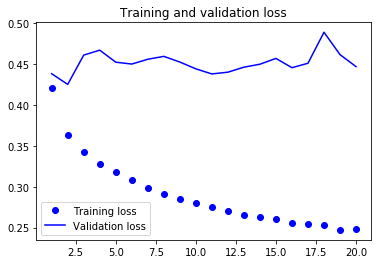

In [25]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# 为耶拿数据集准备更高分辨率的数据生成器
step =3 # 之前设置为6（每小时一个数据点），现在设置为3（每30分钟一个数据点）

# 下面两项保持不变
lookback = 720
delay = 144

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [20]:
# 结合一维卷积基和GRU层的模型
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen, 
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 81s 162ms/step - loss: 0.3354 - val_loss: 0.3141
Epoch 2/20
500/500 [===============

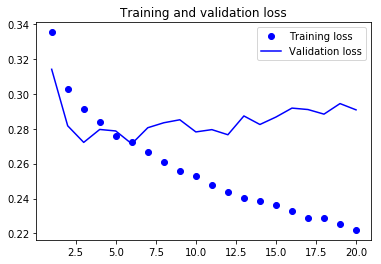

In [22]:
# 绘制结果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()